In [23]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sys.path.append('../')
from hro import *
from bvisual import *

from astropy.wcs import WCS
from reproject import reproject_interp

import os
import imageio

In [24]:
indir='../data/'
prefix='Taurusfwhm10'

In [25]:
# Loading maps for the example, these maps of Stokes I, Q, and U from Planck at 353 GHz
hdu=fits.open(indir+'Taurusfwhm5_logNHmap.fits')
logNHmap=hdu[0].data
hdrREF=hdu[0].header
hdu.close()
hdu=fits.open(indir+prefix+'_Qmap.fits')
Qmap=hdu[0].data
hdu.close()
hdu=fits.open(indir+prefix+'_Umap.fits')
Umap=hdu[0].data
hdu.close()

In [26]:
sz=np.shape(logNHmap)
deltab=60.*hdrREF['CDELT2'] # in arcmin 
ksz=10. # arcmin
pxksz=ksz/deltab
steps=25 # number of histograms
weights=np.ones(sz)*(deltab/ksz)**2

In [27]:
# Simple mask definition
mask=np.ones_like(logNHmap)
mask[(logNHmap < np.mean(logNHmap))]=0.

In [28]:
# HRO calculation
outputhro = hroLITE(logNHmap, Qmap, -Umap, steps=20, minI=np.min(logNHmap), w=weights, mask=mask, ksz=pxksz)

15338
15326
15340
15336
15326
15334
15332
15342
15330
15332
15332
15344
15326
15334
15328
15340
15334
15332
15336
15334


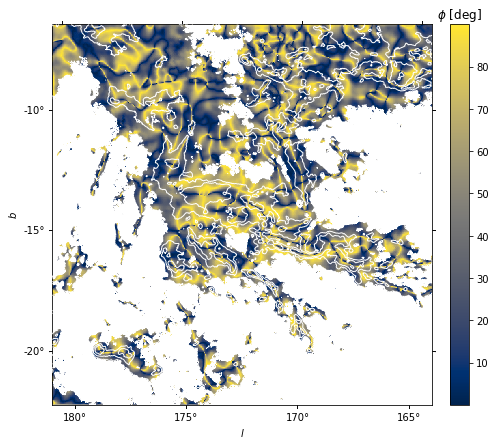

In [29]:
fig = plt.figure(figsize=(8.0,7.0))
plt.rc('font', size=10)
ax1=plt.subplot(111, projection=WCS(hdrREF))
im1=ax1.imshow(np.abs(np.rad2deg(outputhro['Amap'])), origin='lower', cmap='cividis')
ax1.contour(logNHmap, origin='lower', levels=[np.mean(logNHmap),np.mean(logNHmap)+1.0*np.std(logNHmap),np.mean(logNHmap)+2.0*np.std(logNHmap)], colors='white', linewidths=1.0)
ax1.coords[0].set_axislabel(r'$l$')
ax1.coords[1].set_axislabel(r'$b$')
cbar=fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
cbar.ax.set_title(r'$\phi$ [deg]')
plt.show()

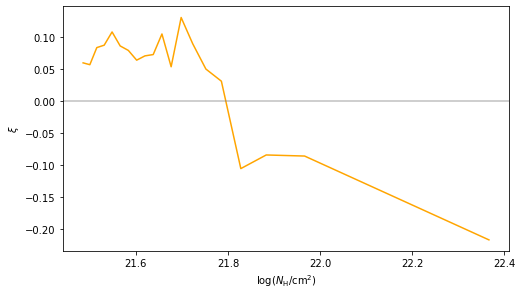

In [22]:
isteps=outputhro['csteps']
icentres=0.5*(isteps[0:np.size(isteps)-1]+isteps[1:np.size(isteps)])

fig = plt.figure(figsize=(8.0,4.5))
plt.rc('font', size=10)
ax1=plt.subplot(111)
ax1.plot(icentres, outputhro['xi'], color='orange')
ax1.axhline(y=0, color='grey', alpha=0.5)
ax1.set_xlabel(r'log($N_{\rm H}/$cm$^{2}$)')
ax1.set_ylabel(r'$\xi$')
plt.show()